<a href="https://colab.research.google.com/github/ezassaye/Comparison_Group_Normal_BMI_Or_Low_Stress-/blob/main/SleepHealthDisorder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-2810693a9061>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Sleep Disorder"].fillna("None", inplace=True)



===== 5-Fold Cross-Validation Results =====

Fold 1 Accuracy: 0.8500
Fold 1 Confusion Matrix:
[[ 8  2  1]
 [ 3 31  0]
 [ 2  1 12]]


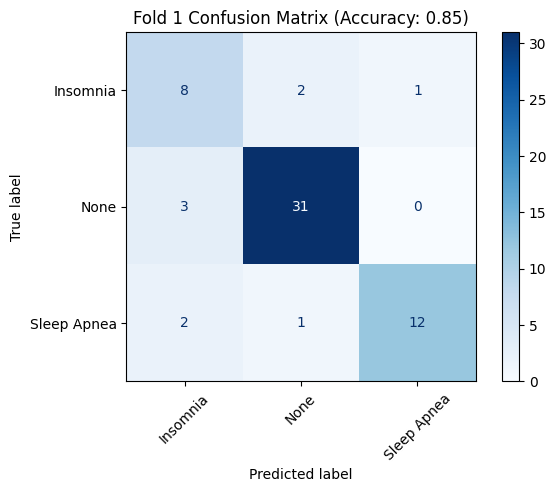


Fold 2 Accuracy: 0.9000
Fold 2 Confusion Matrix:
[[13  0  3]
 [ 0 36  2]
 [ 0  1  5]]


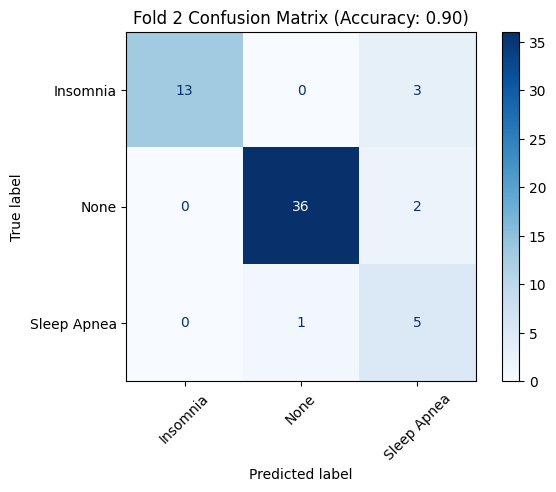


Fold 3 Accuracy: 0.8833
Fold 3 Confusion Matrix:
[[10  3  1]
 [ 0 33  1]
 [ 1  1 10]]


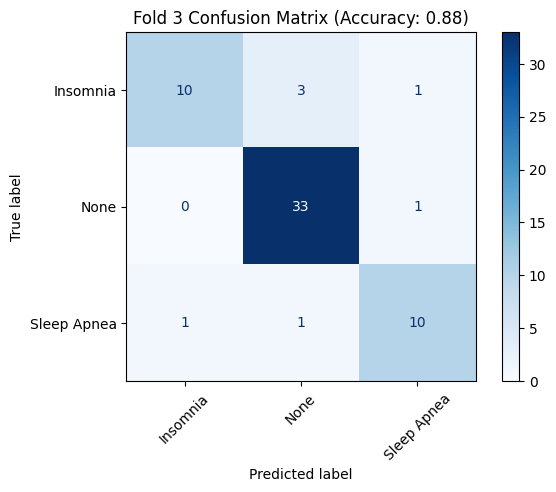


Fold 4 Accuracy: 0.9000
Fold 4 Confusion Matrix:
[[10  0  0]
 [ 1 30  1]
 [ 0  4 14]]


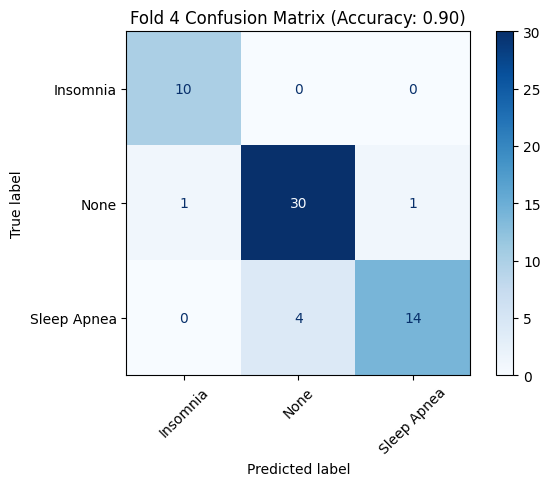


Fold 5 Accuracy: 0.8475
Fold 5 Confusion Matrix:
[[ 8  2  1]
 [ 2 33  2]
 [ 2  0  9]]


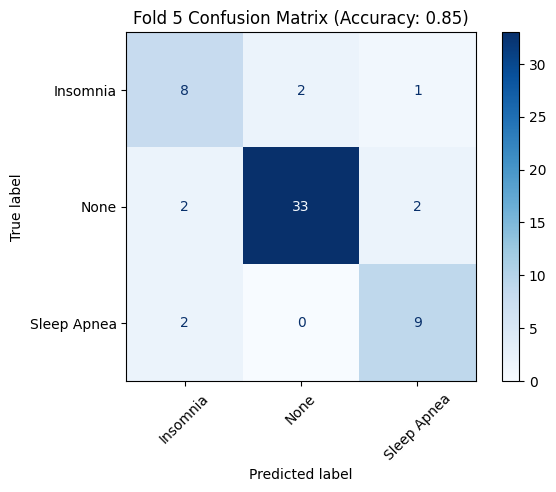

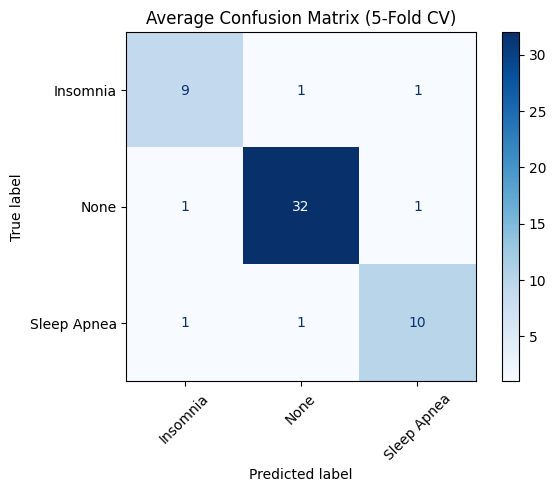


Average 5-Fold CV Accuracy: 0.8762


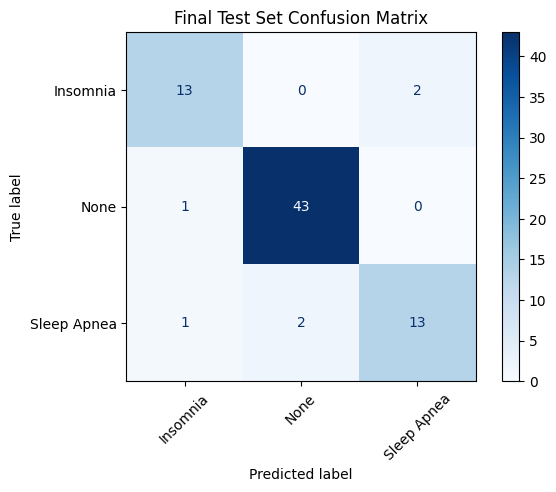


Final Test Accuracy: 0.9200
Classification Report:
               precision    recall  f1-score   support

    Insomnia       0.87      0.87      0.87        15
        None       0.96      0.98      0.97        44
 Sleep Apnea       0.87      0.81      0.84        16

    accuracy                           0.92        75
   macro avg       0.90      0.89      0.89        75
weighted avg       0.92      0.92      0.92        75



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load dataset
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df["Sleep Disorder"].fillna("None", inplace=True)

# Step 1: Drop unused columns
df = df.drop(columns=["Person ID"])

# Step 2: Split features and target
X_raw = df.drop(columns=["Sleep Disorder"])
y_raw = df["Sleep Disorder"]

# Step 3: Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y_raw)
class_labels = le.classes_

# Step 4: Encode categorical & scale numeric
categorical_cols = X_raw.select_dtypes(include='object').columns.tolist()
numerical_cols = X_raw.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

X = preprocessor.fit_transform(X_raw)

# Step 5: Train/Test Split (80/20)
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Step 6: 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
conf_matrices = []
accuracies = []

print("\n===== 5-Fold Cross-Validation Results =====")
for i, (train_idx, val_idx) in enumerate(kf.split(X_trainval), start=1):
    X_train, X_val = X_trainval[train_idx], X_trainval[val_idx]
    y_train, y_val = y_trainval[train_idx], y_trainval[val_idx]

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)

    acc = accuracy_score(y_val, y_val_pred)
    cm = confusion_matrix(y_val, y_val_pred, labels=np.unique(y_encoded))

    print(f"\nFold {i} Accuracy: {acc:.4f}")
    print(f"Fold {i} Confusion Matrix:\n{cm}")

    accuracies.append(acc)
    conf_matrices.append(cm)

    # Plot confusion matrix with rotated x-axis labels
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
    plt.tight_layout()
    plt.title(f"Fold {i} Confusion Matrix (Accuracy: {acc:.2f})")
    plt.show()

# Step 7: Average Confusion Matrix
avg_cm = np.mean(conf_matrices, axis=0).astype(int)
avg_accuracy = np.mean(accuracies)

disp = ConfusionMatrixDisplay(confusion_matrix=avg_cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.tight_layout()
plt.title("Average Confusion Matrix (5-Fold CV)")
plt.show()

print(f"\nAverage 5-Fold CV Accuracy: {avg_accuracy:.4f}")

# Step 8: Train on full trainval and evaluate on test set
final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X_trainval, y_trainval)
y_test_pred = final_model.predict(X_test)

final_cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=final_cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.tight_layout()
plt.title("Final Test Set Confusion Matrix")
plt.show()

final_acc = accuracy_score(y_test, y_test_pred)
print(f"\nFinal Test Accuracy: {final_acc:.4f}")

# Step 9: Classification Report
print("Classification Report:\n",
      classification_report(y_test, y_test_pred, target_names=[str(cls) for cls in class_labels], zero_division=0))


In [ ]:
!pip install imbalanced-learn


<ipython-input-2-a7c17d579db4>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Sleep Disorder"].fillna("None", inplace=True)



===== 5-Fold Cross-Validation Results =====

Fold 1 Accuracy: 0.8500
Fold 1 Confusion Matrix:
[[ 8  2  1]
 [ 3 31  0]
 [ 2  1 12]]


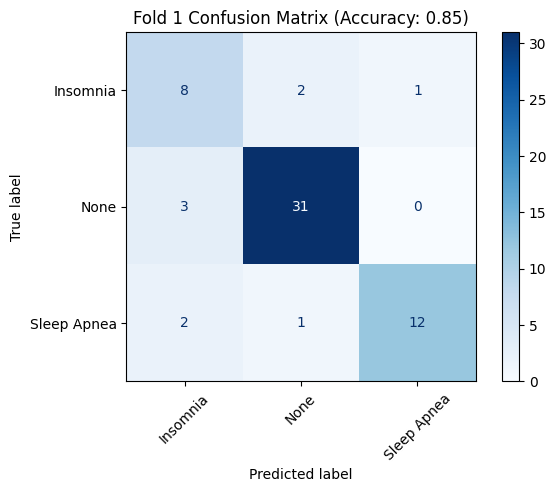


Fold 2 Accuracy: 0.9000
Fold 2 Confusion Matrix:
[[13  0  3]
 [ 0 36  2]
 [ 0  1  5]]


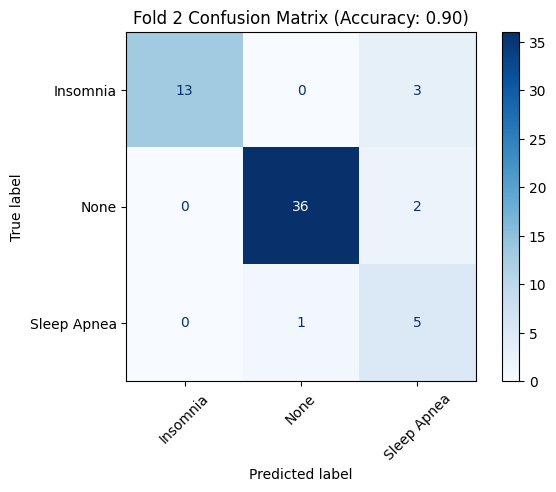


Fold 3 Accuracy: 0.8833
Fold 3 Confusion Matrix:
[[10  3  1]
 [ 0 33  1]
 [ 1  1 10]]


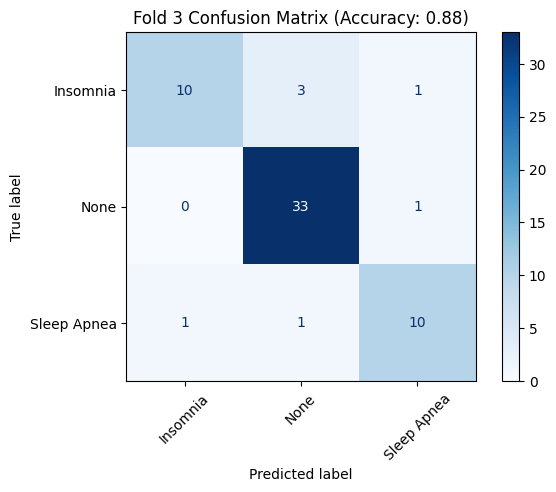


Fold 4 Accuracy: 0.9000
Fold 4 Confusion Matrix:
[[10  0  0]
 [ 1 30  1]
 [ 0  4 14]]


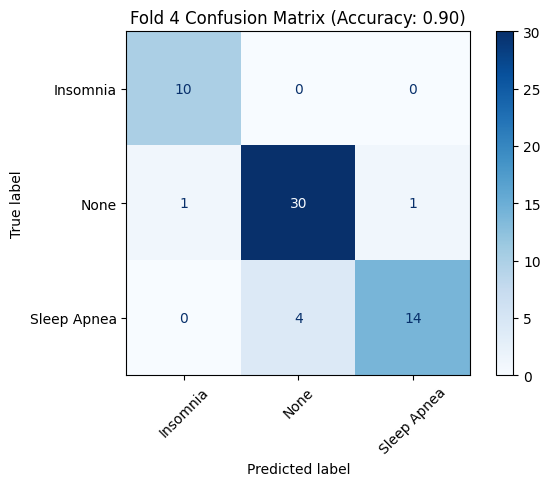


Fold 5 Accuracy: 0.8475
Fold 5 Confusion Matrix:
[[ 8  2  1]
 [ 2 33  2]
 [ 2  0  9]]


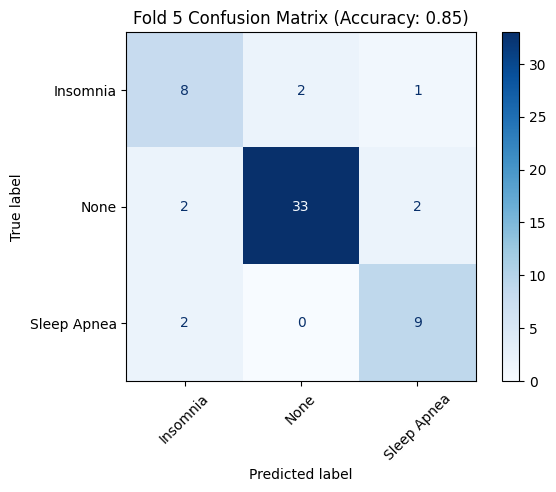

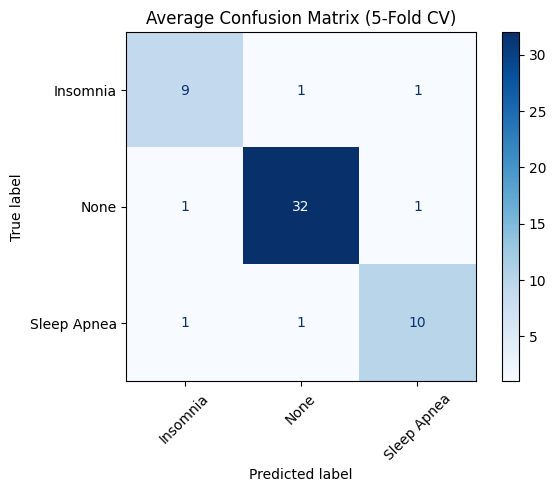


Average 5-Fold CV Accuracy: 0.8762


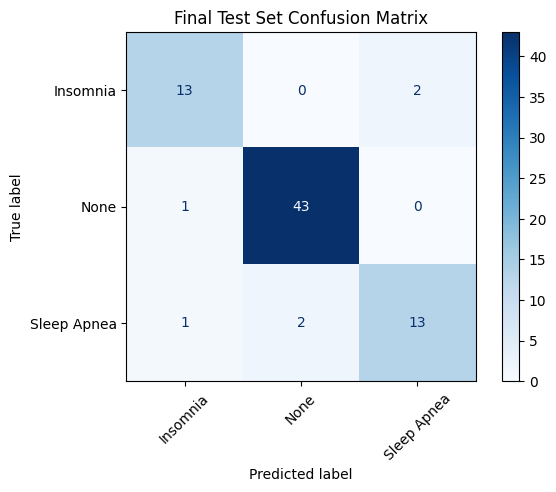


Final Test Accuracy: 0.9200
Classification Report:
               precision    recall  f1-score   support

    Insomnia       0.87      0.87      0.87        15
        None       0.96      0.98      0.97        44
 Sleep Apnea       0.87      0.81      0.84        16

    accuracy                           0.92        75
   macro avg       0.90      0.89      0.89        75
weighted avg       0.92      0.92      0.92        75



<ipython-input-2-a7c17d579db4>:116: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Sleep Disorder"].fillna("None", inplace=True)


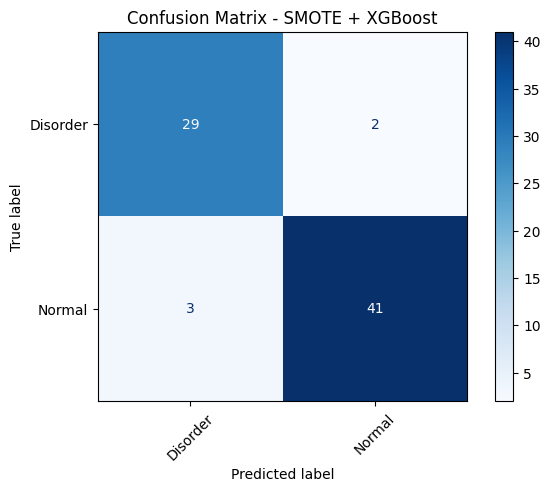

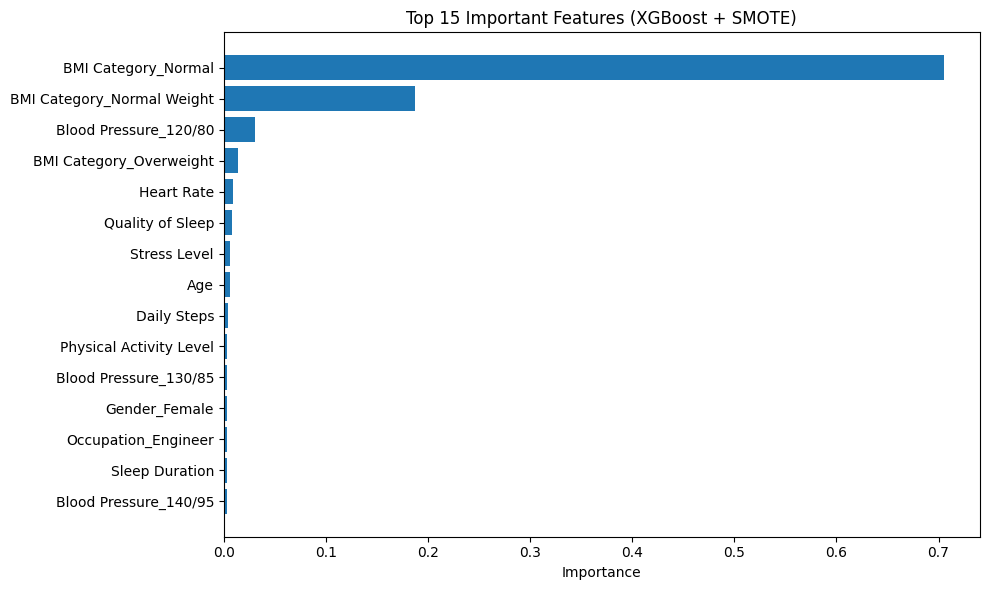

Accuracy: 0.9333
Classification Report:
               precision    recall  f1-score   support

    Disorder       0.91      0.94      0.92        31
      Normal       0.95      0.93      0.94        44

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.93      0.93      0.93        75



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load dataset
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df["Sleep Disorder"].fillna("None", inplace=True)

# Step 1: Drop unused columns
df = df.drop(columns=["Person ID"])

# Step 2: Split features and target
X_raw = df.drop(columns=["Sleep Disorder"])
y_raw = df["Sleep Disorder"]

# Step 3: Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y_raw)
class_labels = le.classes_

# Step 4: Encode categorical & scale numeric
categorical_cols = X_raw.select_dtypes(include='object').columns.tolist()
numerical_cols = X_raw.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

X = preprocessor.fit_transform(X_raw)

# Step 5: Train/Test Split (80/20)
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Step 6: 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
conf_matrices = []
accuracies = []

print("\n===== 5-Fold Cross-Validation Results =====")
for i, (train_idx, val_idx) in enumerate(kf.split(X_trainval), start=1):
    X_train, X_val = X_trainval[train_idx], X_trainval[val_idx]
    y_train, y_val = y_trainval[train_idx], y_trainval[val_idx]

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)

    acc = accuracy_score(y_val, y_val_pred)
    cm = confusion_matrix(y_val, y_val_pred, labels=np.unique(y_encoded))

    print(f"\nFold {i} Accuracy: {acc:.4f}")
    print(f"Fold {i} Confusion Matrix:\n{cm}")

    accuracies.append(acc)
    conf_matrices.append(cm)

    # Plot confusion matrix with rotated x-axis labels
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
    plt.tight_layout()
    plt.title(f"Fold {i} Confusion Matrix (Accuracy: {acc:.2f})")
    plt.show()

# Step 7: Average Confusion Matrix
avg_cm = np.mean(conf_matrices, axis=0).astype(int)
avg_accuracy = np.mean(accuracies)

disp = ConfusionMatrixDisplay(confusion_matrix=avg_cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.tight_layout()
plt.title("Average Confusion Matrix (5-Fold CV)")
plt.show()

print(f"\nAverage 5-Fold CV Accuracy: {avg_accuracy:.4f}")

# Step 8: Train on full trainval and evaluate on test set
final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X_trainval, y_trainval)
y_test_pred = final_model.predict(X_test)

final_cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=final_cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.tight_layout()
plt.title("Final Test Set Confusion Matrix")
plt.show()

final_acc = accuracy_score(y_test, y_test_pred)
print(f"\nFinal Test Accuracy: {final_acc:.4f}")

# Step 9: Classification Report
print("Classification Report:\n",
      classification_report(y_test, y_test_pred, target_names=[str(cls) for cls in class_labels], zero_division=0))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Load lifestyle dataset
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df["Sleep Disorder"].fillna("None", inplace=True)

# Map target to binary
df["Label"] = df["Sleep Disorder"].apply(lambda x: "Normal" if x == "None" else "Disorder")
df = df.drop(columns=["Person ID", "Sleep Disorder"])

# Split into X and y
X_raw = df.drop(columns=["Label"])
y_raw = df["Label"]

# Encode features
categorical_cols = X_raw.select_dtypes(include='object').columns.tolist()
numerical_cols = X_raw.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

X_encoded = preprocessor.fit_transform(X_raw)

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y_raw)
class_labels = le.classes_

# Split into train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Apply SMOTE to balance training data
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

# Train XGBoost
model = XGBClassifier(eval_metric="logloss", random_state=42)
model.fit(X_train_bal, y_train_bal)

# Predict on test set
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=class_labels, zero_division=0)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.tight_layout()
plt.title("Confusion Matrix - SMOTE + XGBoost")
plt.show()

# Feature importance plot
ohe = preprocessor.named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(categorical_cols)
all_feature_names = numerical_cols + list(cat_feature_names)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1][:15]

plt.figure(figsize=(10, 6))
plt.barh(np.array(all_feature_names)[indices][::-1], importances[indices][::-1])
plt.xlabel("Importance")
plt.title("Top 15 Important Features (XGBoost + SMOTE)")
plt.tight_layout()
plt.show()

# Print report
print(f"Accuracy: {acc:.4f}")
print("Classification Report:\n", report)

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Step 1: Load and preprocess data
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df["Sleep Disorder"].fillna("None", inplace=True)
df["Label"] = df["Sleep Disorder"].apply(lambda x: "Normal" if x == "None" else "Disorder")
df = df.drop(columns=["Person ID", "Sleep Disorder"])

# Step 2: Split features and labels
X_raw = df.drop(columns=["Label"])
y_raw = df["Label"]

# Step 3: Preprocessing (StandardScaler + OneHotEncoder)
categorical_cols = X_raw.select_dtypes(include='object').columns.tolist()
numerical_cols = X_raw.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])
X_encoded = preprocessor.fit_transform(X_raw)

# Step 4: Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y_raw)

# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Step 6: Apply SMOTE to balance the training set
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

# Step 7: Train the model
model = XGBClassifier(eval_metric="logloss", random_state=42)
model.fit(X_train_bal, y_train_bal)

# ✅ Step 8: Save model in JSON format
model.get_booster().save_model("final_model.json")

# Also save the preprocessor and label encoder (they can still use joblib)
joblib.dump(preprocessor, "final_preprocessor.pkl")
joblib.dump(le, "final_label_encoder.pkl")

print("✅ Files saved: final_model.json, final_preprocessor.pkl, final_label_encoder.pkl")


✅ Files saved: final_model.json, final_preprocessor.pkl, final_label_encoder.pkl


<ipython-input-2-c051a0e900bf>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Sleep Disorder"].fillna("None", inplace=True)


In [ ]:
!pip install imbalanced-learn
